# Problem Statement

In the contemporary marketplace, businesses have cutthroat competition. Keeping a high consumer engagement rate is a top priority for businesses.

Analyzing the vast amount of data collected from the consumers is a challenging task. However, it is crucial to understand the consumer's behavior and preferences to improve the product and services.

Our Task is to decode the unseen patterns in customer preferences and behaviors through a series of advanced analytical techniques, including Exploratory Data Analysis, Univariate and Bivariate Analysis, and Unsupervised Learning. The ultimate goal is to leverage these insights to segment customers efficiently.

- The dataset paints a picture of 2.240 indivuals who 
were approached and includes socio-demographic and firmographic features about them. Additionally, it flags those who were inspired by the compaign and decided to buy the product.

## Customer Data Attributes

1. **ClientID**: Customer's unique identifier
2. **BirthYear**: Customer's birth year
3. **AcademicLevel**: Customer's education level
4. **RelationshipStatus**: Customer's marital status
5. **AnnualIncome**: Customer's yearly household income
6. **ChildrenAtHome**: Number of small children in customer’s household
7. **TeensAtHome**: Number of teenagers in customer’s household
8. **EnrollmentDate**: Date of customer’s enrollment with the company
9. **LastPurchaseDays**: Number of days since customer’s last purchase
10. **RecentComplaint**: 1 if the customer complained in the last 2 years, 0 otherwise
11. **WineSpending**: Amount spent on wine in last 2 years
12. **FruitSpending**: Amount spent on fruits in last 2 years
13. **MeatSpending**: Amount spent on meat in last 2 years
14. **FishSpending**: Amount spent on fish in last 2 years
15. **SweetSpending**: Amount spent on sweets in last 2 years
16. **GoldSpending**: Amount spent on gold in last 2 years
17. **Campaign1Success**: If customer accepted the offer in the 1st campaign, 0 otherwise
18. **Campaign2Success**: If customer accepted the offer in the 2nd campaign, 0 otherwise
19. **Campaign3Success**: If customer accepted the offer in the 3rd campaign, 0 otherwise
20. **Campaign4Success**: If customer accepted the offer in the 4th campaign, 0 otherwise
21. **Campaign5Success**: If customer accepted the offer in the 5th campaign, 0 otherwise
22. **LastCampaignResponse**: If customer accepted the offer in the last campaign, 0 otherwise
23. **WebPurchases**: Number of purchases made through the company’s website
24. **StorePurchases**: Number of purchases made directly in the store
25. **CatalogPurchases**: Number of purchases made through a catalog
26. **DiscountedPurchases**: Number of purchases made with a discount
27. **WebVisitsMonth**: Number of visits to the website in the last month

## TABLE OF CONTENTS:
* [LOAD DATA](#LOAD-DATA)
* [DATA PREPROCESSING](#DATA-PREPROCESSING)
* [FEATURE ENGINEERING](#FEATURE-ENGINEERING)
* [UNIVARIATE ANALYSIS](#UNIVARIATE-ANALYSIS)
* [BIVARIATE ANALYSIS](#BIVARIATE-ANALYSIS)

In [839]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import scipy.stats as stats
# Ignoring Warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Setting Seed for Reproducibility
np.random.seed(123) 

# LOAD DATA

In [840]:
# Loading data
data = pd.read_csv("dataset\dataset.csv", sep="\t")


In [841]:
# Looking at the first five rows
data.columns

Index(['ClientID', 'BirthYear', 'AcademicLevel', 'RelationshipStatus',
       'AnnualIncome', 'ChildrenAtHome', 'TeensAtHome', 'EnrollmentDate',
       'LastPurchaseDays', 'WineSpending', 'FruitSpending', 'MeatSpending',
       'FishSpending', 'SweetSpending', 'GoldSpending', 'DiscountedPurchases',
       'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'WebVisitsMonth',
       'Campaign3Success', 'Campaign4Success', 'Campaign5Success',
       'Campaign1Success', 'Campaign2Success', 'RecentComplaint', 'Z_CC',
       'Z_R', 'LastCampaignResponse'],
      dtype='object')

In [842]:
data.tail(5)

,ClientID,BirthYear,AcademicLevel,RelationshipStatus,AnnualIncome,ChildrenAtHome,TeensAtHome,EnrollmentDate,LastPurchaseDays,WineSpending,...,WebVisitsMonth,Campaign3Success,Campaign4Success,Campaign5Success,Campaign1Success,Campaign2Success,RecentComplaint,Z_CC,Z_R,LastCampaignResponse
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### Data Preprocessing

In [843]:
data.describe()

,ClientID,BirthYear,AnnualIncome,ChildrenAtHome,TeensAtHome,LastPurchaseDays,WineSpending,FruitSpending,MeatSpending,FishSpending,...,WebVisitsMonth,Campaign3Success,Campaign4Success,Campaign5Success,Campaign1Success,Campaign2Success,RecentComplaint,Z_CC,Z_R,LastCampaignResponse
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [844]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClientID              2240 non-null   int64  
 1   BirthYear             2240 non-null   int64  
 2   AcademicLevel         2240 non-null   object 
 3   RelationshipStatus    2240 non-null   object 
 4   AnnualIncome          2216 non-null   float64
 5   ChildrenAtHome        2240 non-null   int64  
 6   TeensAtHome           2240 non-null   int64  
 7   EnrollmentDate        2240 non-null   object 
 8   LastPurchaseDays      2240 non-null   int64  
 9   WineSpending          2240 non-null   int64  
 10  FruitSpending         2240 non-null   int64  
 11  MeatSpending          2240 non-null   int64  
 12  FishSpending          2240 non-null   int64  
 13  SweetSpending         2240 non-null   int64  
 14  GoldSpending          2240 non-null   int64  
 15  DiscountedPurchases  

**Takeaway:**
- We have `3 categorical` variables and `26 numerical` values
- We have missing values for `AnnualIncome` Variable.
- `EnrollmentDate` is in `object` format.

In [845]:
# Checking for missing values

In [846]:
data.isnull().sum()

ClientID                 0
BirthYear                0
AcademicLevel            0
RelationshipStatus       0
AnnualIncome            24
ChildrenAtHome           0
TeensAtHome              0
EnrollmentDate           0
LastPurchaseDays         0
WineSpending             0
FruitSpending            0
MeatSpending             0
FishSpending             0
SweetSpending            0
GoldSpending             0
DiscountedPurchases      0
WebPurchases             0
CatalogPurchases         0
StorePurchases           0
WebVisitsMonth           0
Campaign3Success         0
Campaign4Success         0
Campaign5Success         0
Campaign1Success         0
Campaign2Success         0
RecentComplaint          0
Z_CC                     0
Z_R                      0
LastCampaignResponse     0
dtype: int64

`AnnualIncome`  has `24` null values 

In [847]:
data['AnnualIncome'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: AnnualIncome, dtype: float64

In [848]:
mode_value = data['AnnualIncome'].mode()[0]
mode_value

7500.0

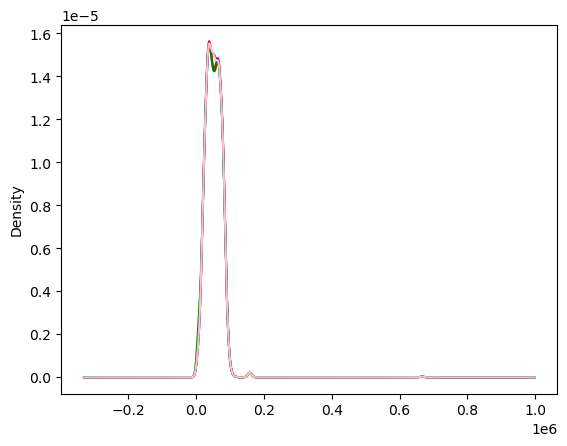

In [849]:
data['AnnualIncome_mean'] = data['AnnualIncome'].fillna(data['AnnualIncome'].mean()) # filling with missing value
data['AnnualIncome_mode'] = data['AnnualIncome'].fillna(mode_value) #filling with mode value
data['AnnualIncome_median'] = data['AnnualIncome'].fillna(data['AnnualIncome'].median())#filling with median value
fig  = plt.figure()
ax = fig.add_subplot(111)
data['AnnualIncome'].plot(kind ='kde',ax  = ax ,color  =  'red')
data['AnnualIncome_mean'].plot(kind ='kde',ax  = ax ,color  =  'blue')
data['AnnualIncome_mode'].plot(kind ='kde',ax  = ax ,color  =  'green')
data['AnnualIncome_median'].plot(kind ='kde',ax  = ax ,color  =  'pink')
data['AnnualIncome'] = data['AnnualIncome'].fillna(mode_value)
plt.show()

After conducting a comparative analysis by plotting graphs with missing values filled using mean,
mode, and median imputation techniques, it was determined that mode imputation yielded the most
accurate results due to complete overlap. Consequently, we will proceed with 
filling missing values utilizing the mode value

In [850]:
data = data.drop(columns =['AnnualIncome_mean','AnnualIncome_mode','AnnualIncome_median'])
data

,ClientID,BirthYear,AcademicLevel,RelationshipStatus,AnnualIncome,ChildrenAtHome,TeensAtHome,EnrollmentDate,LastPurchaseDays,WineSpending,...,WebVisitsMonth,Campaign3Success,Campaign4Success,Campaign5Success,Campaign1Success,Campaign2Success,RecentComplaint,Z_CC,Z_R,LastCampaignResponse
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [851]:
# Change EnrollmentDate into suitable format

In [852]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClientID              2240 non-null   int64  
 1   BirthYear             2240 non-null   int64  
 2   AcademicLevel         2240 non-null   object 
 3   RelationshipStatus    2240 non-null   object 
 4   AnnualIncome          2240 non-null   float64
 5   ChildrenAtHome        2240 non-null   int64  
 6   TeensAtHome           2240 non-null   int64  
 7   EnrollmentDate        2240 non-null   object 
 8   LastPurchaseDays      2240 non-null   int64  
 9   WineSpending          2240 non-null   int64  
 10  FruitSpending         2240 non-null   int64  
 11  MeatSpending          2240 non-null   int64  
 12  FishSpending          2240 non-null   int64  
 13  SweetSpending         2240 non-null   int64  
 14  GoldSpending          2240 non-null   int64  
 15  DiscountedPurchases  

In [853]:
data['EnrollmentDate'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: EnrollmentDate, dtype: object

current datatype of EnrollmentDate is object type

In [854]:
data['EnrollmentDate'] =  pd.to_datetime(data['EnrollmentDate'],format='mixed')
data['EnrollmentDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: EnrollmentDate
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [855]:
data['EnrollmentDate'].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: EnrollmentDate, dtype: datetime64[ns]

now EnrollmentDate is in timedate formate and we can extract day, month and year as a  separate column

In [856]:
# Check for homogeneity in feature values, drop any feature if they do not hold any discriminatory power.

### FEATURE ENGINEERING

- We will create a new column `Age` by subtracting `BirthYear` from the current year.
<!-- - We will convert `AcademicLevel` values to Undergraduate and Postgraduate. -->
- We will create a new column `Children` by adding `ChildrenAtHome` and `TeensAtHome`.
- We will create a new column `TotalSpent` by adding all the `Spending` columns.
- We will create a new column `TotalPurchases` by adding all the `Purchases` columns.
- We will create a new column `TotalSuccessfulCampaigns` by adding all the `Campaign Success` columns.
- We will create a new column `CustomerSince` by subtracting `EnrollmentDate` from the current date.
- We will create a new column `IsParent` by converting the `Children` column to `1` and `0`.
- We will convert `RelationshipStatus` to `Relationship` and `Single`.


In [857]:
# create a new column `Age` by subtracting `BirthYear` from the current year.

data['Age'] = 2024 - data['BirthYear']


In [858]:
# Convert AcademicLevel values to Undergraduate and Postgraduate.

# data['AcademicLevel'] = data['AcademicLevel'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], "Post Graduate")
# data['AcademicLevel'] = data['AcademicLevel'].replace(["Basic"], "Under Graduate")


In [859]:
# Converting RelationshipStatus to Understandable Format
data["RelationshipStatus"] = data["RelationshipStatus"].replace(['Single', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], "Single")
data["RelationshipStatus"] = data["RelationshipStatus"].replace(["Married", "Together"], "Relationship")

In [860]:
# Creating a new column 'TotalSpent'
data['TotalSpent'] = data['WineSpending'] + data['FruitSpending'] + data['MeatSpending'] + data['FishSpending'] + data['SweetSpending'] + data['GoldSpending']


In [861]:
# Converting RelationshipStatus to Understandable Format
data["RelationshipStatus"] = data["RelationshipStatus"].replace(['Single', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], "Single")
data["RelationshipStatus"] = data["RelationshipStatus"].replace(["Married", "Together"], "Relationship")


In [862]:
# Creating a new column 'TotalSpent'
data['TotalSpent'] = data['WineSpending'] + data['FruitSpending'] + data['MeatSpending'] + data['FishSpending'] + data['SweetSpending'] + data['GoldSpending']

In [863]:
# Creating a new column 'Children'
data['Children'] = data['ChildrenAtHome'] + data['TeensAtHome']

In [864]:
# CustomerSince column
years = []
for date in data['EnrollmentDate']:
    years.append(2024 - date.year)
data['CustomerSince'] = years  

In [865]:
# TotalPurchases column
data['TotalPurchases'] = data['DiscountedPurchases'] + data['WebPurchases'] + data['CatalogPurchases'] + data['StorePurchases']

In [866]:
# TotalSuccessfulCampaignsSuccess column
data['TotalSuccessfulCampaignsSuccess'] = data['Campaign1Success'] + data['Campaign2Success'] + data['Campaign3Success'] + data['Campaign4Success'] + data['Campaign5Success']

In [867]:
# Is_Parent column
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

In [868]:
# Dropping unnecessary columns


New DataFrame Overview:

In [869]:
data.head()

,ClientID,BirthYear,AcademicLevel,RelationshipStatus,AnnualIncome,ChildrenAtHome,TeensAtHome,EnrollmentDate,LastPurchaseDays,WineSpending,...,Z_CC,Z_R,LastCampaignResponse,Age,TotalSpent,Children,CustomerSince,TotalPurchases,TotalSuccessfulCampaignsSuccess,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,11,1,67,1617,0,12,25,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,3,11,0,70,27,2,10,6,0,1
2,4141,1965,Graduation,Relationship,71613.0,0,0,2013-08-21,26,426,...,3,11,0,59,776,0,11,21,0,0
3,6182,1984,Graduation,Relationship,26646.0,1,0,2014-10-02,26,11,...,3,11,0,40,53,1,10,8,0,1
4,5324,1981,PhD,Relationship,58293.0,1,0,2014-01-19,94,173,...,3,11,0,43,422,1,10,19,0,1


### UNIVARIATE ANALYSIS

In [870]:
# Plots For The Engineered Features

In [871]:
 data.columns

Index(['ClientID', 'BirthYear', 'AcademicLevel', 'RelationshipStatus',
       'AnnualIncome', 'ChildrenAtHome', 'TeensAtHome', 'EnrollmentDate',
       'LastPurchaseDays', 'WineSpending', 'FruitSpending', 'MeatSpending',
       'FishSpending', 'SweetSpending', 'GoldSpending', 'DiscountedPurchases',
       'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'WebVisitsMonth',
       'Campaign3Success', 'Campaign4Success', 'Campaign5Success',
       'Campaign1Success', 'Campaign2Success', 'RecentComplaint', 'Z_CC',
       'Z_R', 'LastCampaignResponse', 'Age', 'TotalSpent', 'Children',
       'CustomerSince', 'TotalPurchases', 'TotalSuccessfulCampaignsSuccess',
       'Is_Parent'],
      dtype='object')

engineered featured  : - ['Age', 'TotalSpent', 'Children',
       'CustomerSince', 'TotalPurchases', 'TotalSuccessfulCampaignsSuccess',
       'Is_Parent']

<Axes: >

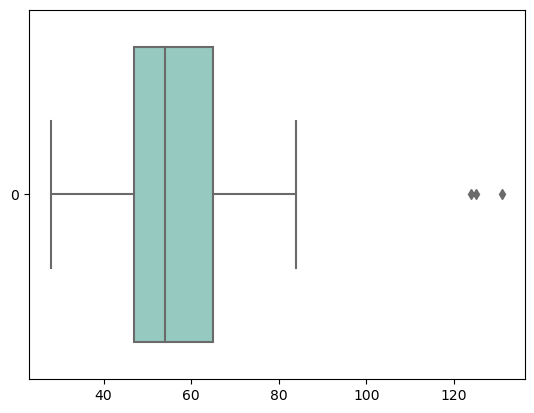

In [872]:
sns.boxplot(data['Age'] , orient ='h' , palette = 'Set3')

In [873]:
upper_limit = data['Age'].mean() + 3*data['Age'].std() 
lower_limit = data['Age'].mean() - 3*data['Age'].std()
replaced_value  = data['Age'].median()
x = data[(data['Age']>upper_limit) | (data['Age']<lower_limit)]
data['Age'] = np.where(data['Age'] > upper_limit,upper_limit, 
                              np.where(data['Age'] < lower_limit,lower_limit , data['Age'] ))
print(upper_limit ,lower_limit , replaced_value ) 
print('number of outlires:',x.shape[0] , ',outlire are capped')

91.14640479922893 19.24198805791393 54.0
number of outlires: 3 ,outlire are capped


<Axes: >

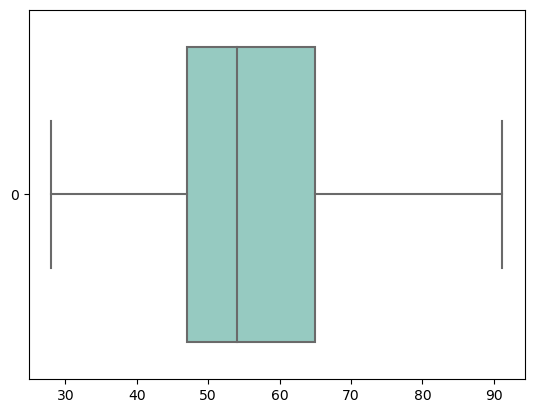

In [874]:
sns.boxplot(data['Age'] , orient ='h' , palette = 'Set3')

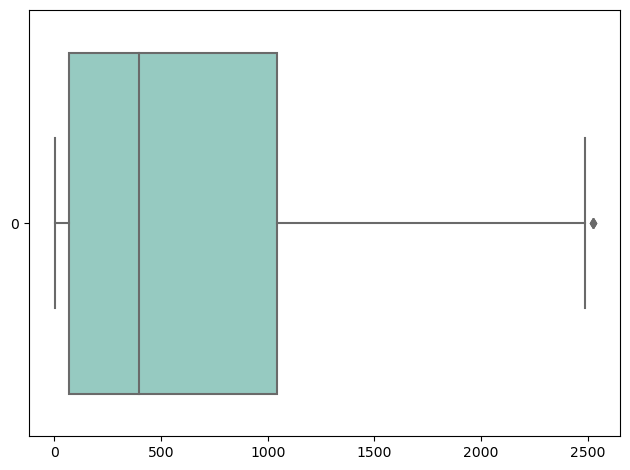

In [875]:
sns.boxplot(data['TotalSpent'], orient = 'h' , palette= 'Set3')
plt.tight_layout()

In [876]:
upper_limit = data['TotalSpent'].mean() + 3*data['TotalSpent'].std() 
lower_limit = data['TotalSpent'].mean() - 3*data['TotalSpent'].std()
replaced_value  = data['TotalSpent'].median()
x = data[(data['TotalSpent']>upper_limit) | (data['TotalSpent']<lower_limit)]
data['TotalSpent'] = np.where(data['TotalSpent'] > upper_limit,upper_limit, 
                              np.where(data['TotalSpent'] < lower_limit,lower_limit , data['TotalSpent'] ))
print(upper_limit ,lower_limit , replaced_value )
print('number of outlires:',x.shape[0] , ',outlire are capped')

2412.5460783186177 -1200.9496497471891 396.0
number of outlires: 5 ,outlire are capped


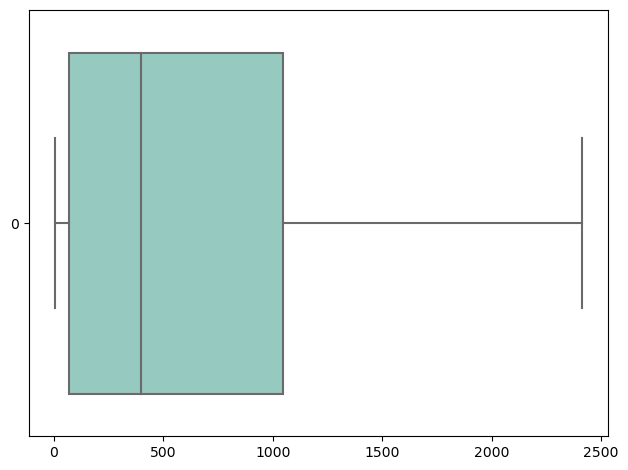

In [877]:
sns.boxplot(data['TotalSpent'], orient = 'h' , palette= 'Set3')
plt.tight_layout()

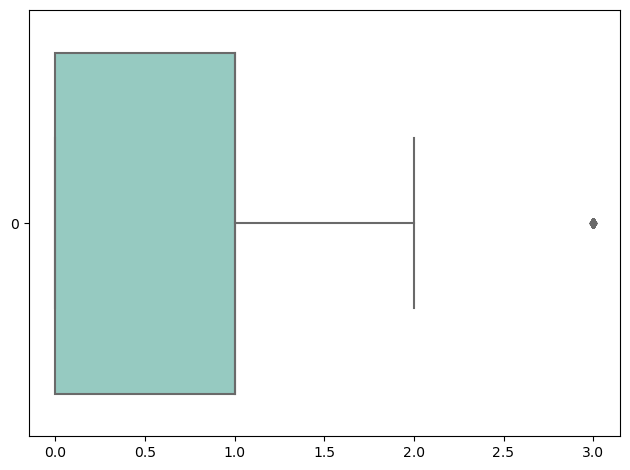

In [878]:
sns.boxplot(data['Children'], orient = 'h' , palette= 'Set3')
plt.tight_layout()

In [879]:
data['Children'].value_counts()

Children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

hence max number of children is 3 so it contain no outlires

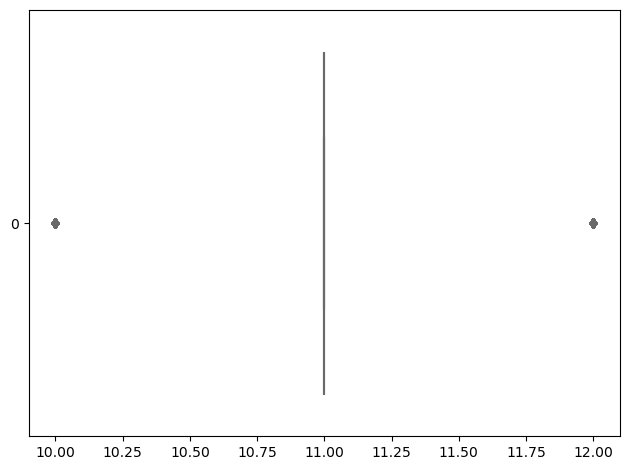

In [880]:
sns.boxplot(data['CustomerSince'], orient = 'h' , palette= 'Set3')
plt.tight_layout()

In [881]:
upper_limit = data['CustomerSince'].mean() + 3*data['CustomerSince'].std() 
lower_limit = data['CustomerSince'].mean() - 3*data['CustomerSince'].std()
replaced_value  = data['CustomerSince'].median()
x = data[(data['CustomerSince']>upper_limit) | (data['CustomerSince']<lower_limit)]
data['CustomerSince'] = np.where(data['CustomerSince'] > upper_limit,upper_limit, 
                              np.where(data['CustomerSince'] < lower_limit,lower_limit , data['CustomerSince'] ))
print(upper_limit ,lower_limit , replaced_value )
print('number of outlires :' ,x.shape[0])

13.025537957522413 8.918212042477588 11.0
number of outlires : 0


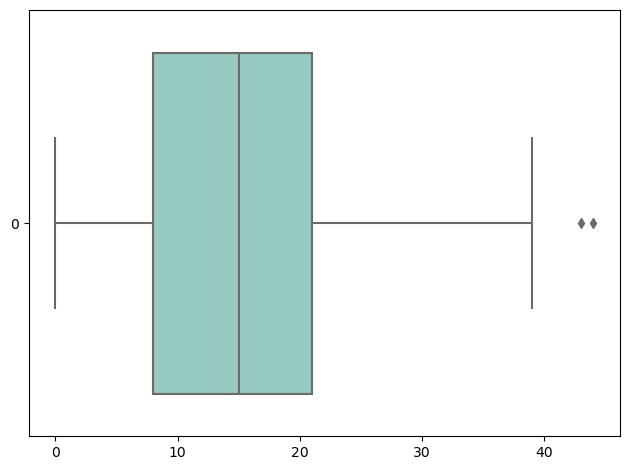

In [882]:
sns.boxplot(data['TotalPurchases'], orient = 'h' , palette= 'Set3')
plt.tight_layout()

In [883]:
upper_limit = data['TotalPurchases'].mean() + 3*data['TotalPurchases'].std() 
lower_limit = data['TotalPurchases'].mean() - 3*data['TotalPurchases'].std() 
replaced_value  = data['TotalPurchases'].median()
x = data[(data['TotalPurchases']>upper_limit) | (data['TotalPurchases']<lower_limit)]
data['TotalPurchases'] = np.where(data['TotalPurchases'] > upper_limit,upper_limit, 
                              np.where(data['TotalPurchases'] < lower_limit,lower_limit , data['TotalPurchases'] ))
print(upper_limit ,lower_limit , replaced_value )
print('number of outlires:', x.shape[0] , ',outlire are capped')

37.89357139595621 -8.169464253099065 15.0
number of outlires: 3 ,outlire are capped


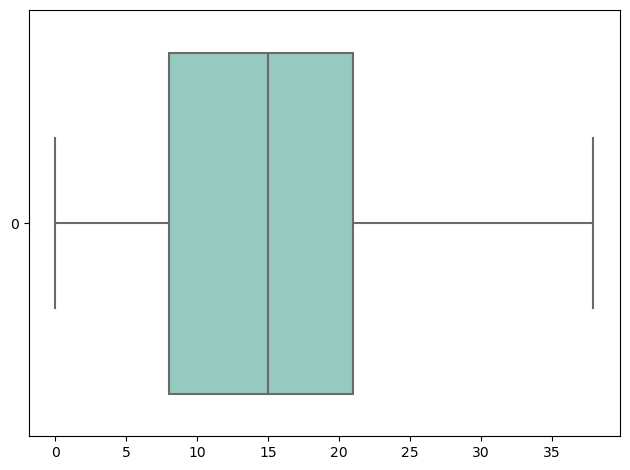

In [884]:
sns.boxplot(data['TotalPurchases'], orient = 'h' , palette= 'Set3')
plt.tight_layout()

 'Is_Parent' contain only 0 and 1 values so it does't contain any outlire

In [885]:
 data['Is_Parent'].value_counts()

Is_Parent
1    1602
0     638
Name: count, dtype: int64

In [886]:
data[ 'TotalSuccessfulCampaignsSuccess'].value_counts()

TotalSuccessfulCampaignsSuccess
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64

max TotalSuccessfulCampaignsSuccess can be 5 so it doesn't contain any outlires

hence all engineered feature have no outlires

## BIVARIATE ANALYSIS

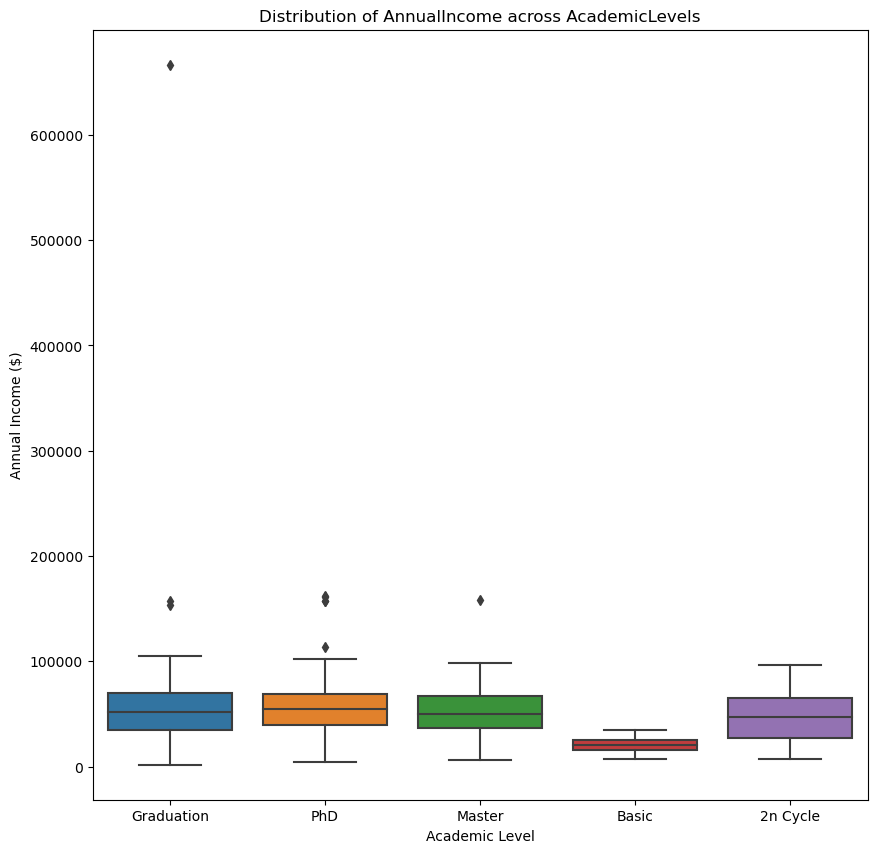

In [887]:
# AnnualIncome by AcademicLevel
analysisData = pd.DataFrame({
    'AcademicLevel': data['AcademicLevel'],
    'AnnualIncome': data['AnnualIncome'],
})
plt.figure(figsize=(10, 10))
sns.boxplot(x='AcademicLevel', y='AnnualIncome', data=analysisData)
plt.title('Distribution of AnnualIncome across AcademicLevels')
plt.xlabel('Academic Level')
plt.ylabel('Annual Income ($)')
plt.show()

In [888]:
# Statistically Test If Average of AnnualIncome is the same for both PHD Owners and Master Owners.

phd_income = data[data['AcademicLevel'] == 'PhD']['AnnualIncome']
master_income = data[data['AcademicLevel'] == 'Master']['AnnualIncome']

statistic, p_value = stats.mannwhitneyu(phd_income, master_income)

alpha = 0.05

print("Null Hypothesis: The distributions of AnnualIncome for PhD and Master degree owners are the same.")
print("Alternate Hypothesis: The distributions of AnnualIncome for PhD and Master degree owners are different.\n")

print("Performing the Mann-Whitney U Test to check the hypothesis...")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Significance:", alpha)

if p_value < alpha:
    print("\nNull hypothesis is rejected. There is a significant difference in average AnnualIncome between PHD and Master degree owners.")
else:
    print("Cannot reject Null hypothesis. There is no significant difference in average AnnualIncome between PHD and Master degree owners.")

Null Hypothesis: The distributions of AnnualIncome for PhD and Master degree owners are the same.
Alternate Hypothesis: The distributions of AnnualIncome for PhD and Master degree owners are different.

Performing the Mann-Whitney U Test to check the hypothesis...
Statistic: 97874.5
p-value: 0.026259430805670697
Significance: 0.05

Null hypothesis is rejected. There is a significant difference in average AnnualIncome between PHD and Master degree owners.
